In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import glob
import getpass
import importlib
import functions
import spectrogram_plotting_functions
import scipy.signal
importlib.reload(functions)
importlib.reload(spectrogram_plotting_functions)

In [ ]:

user= (getpass.getuser())
print("Hello", user)

base='C:\\Users\\{}\\Dropbox\\CPLab'.format(user)
files = glob.glob(base+'\\all_data_mat\\*.mat')
savepath = base+'\\results\\'
print(files)

In [21]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
files=['C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk1_nocontext.mat']
event_data_df=[]

events_codes_all = {}
before_data_power_df=pd.DataFrame(columns=['rat_id','task','channel_id','before_data_power','before_data_spec'])
averaged_data=pd.DataFrame(columns=['rat_id','task','channel_id','average_power_spectrum'])
averaged_data_welch=pd.DataFrame(columns=['rat_id','task','channel_id','average_power_spectrum'])

for file in files:
#    if 'dk6' in file:
        print(file)
        base_name = os.path.basename(file)
        base_name, _ = os.path.splitext(base_name)

        date, rat_id, task = functions.exp_params(base_name)
        print(date, rat_id, task)
        if task == 'nocontextday2' or task == 'nocontextos2':
            task = 'nocontext'
        print(date, rat_id, task)

        f = h5py.File(file, 'r')
        channels = list(f.keys())
        print(channels)

        if 'Keyboard' in channels:
            events = f['Keyboard']
        elif 'keyboard' in channels:
            events = f['keyboard']
        elif 'memory' in channels:
            events = f['memory']
        elif 'Memory' in channels:
            events = f['Memory']

        events_codes = np.array(events['codes'][0])
        events_times = np.array(events['times'][0])
        events_codes_all[base_name] = events_codes
        epochs = functions.generate_epochs_with_first_event(events_codes, events_times)

        first_event = events_times[0]
        event_array=np.empty((len(epochs),2,4000))

        for i, epochi in enumerate(epochs):
            door_timestamp = epochi[0][0]
            trial_type = epochi[0][1]
            dig_type = epochi[1, 1]
            print(dig_type)
            dig_timestamp = epochi[1, 0]
            print(door_timestamp, trial_type, dig_timestamp, dig_type)
            channel_num=0
            aon_channels = [channeli for channeli in channels if 'AON' in channeli]
            vhp_channels = [channeli for channeli in channels if 'vHp' in channeli]
            print(aon_channels, vhp_channels)
            
            def channel_mean(channel_list):
                print(len(channel_list))
                channel_data_array=np.empty((len(channel_list),4000))

                for j,channel in enumerate(channel_list):
                    channel_data=f[channel]
                    raw_data = np.array(channel_data['values']).flatten()
                    raw_time = np.array(channel_data['times']).flatten()
                    sampling_rate = int(1 / channel_data['interval'][0][0])
                    notch_filtered_data = functions.iir_notch(raw_data, sampling_rate, 60)
                    normalized_data, time, data_before = functions.data_normalization(notch_filtered_data, raw_time, first_event, sampling_rate)
                    total = normalized_data
                    data_door_before,data_door_after=functions.extract_door_data(total, time, door_timestamp, sampling_rate)    
                    channel_data_array[j,:]=data_door_after
                
                channel_data_mean=np.mean(channel_data_array,axis=0)
                print(channel_data_mean.shape)
                return channel_data_mean
            
            aon_data=channel_mean(aon_channels)
            vhp_data=channel_mean(vhp_channels)
            
            event_array[i,0,:]=aon_data
            event_array[i,1,:]=vhp_data
            
            # for channeli in channels:
                
            #     if "AON" in channeli or "vHp" in channeli:
            #         channel_id = channeli
            #         print(channel_id)
                    
                    
            #         data_all = f[channeli]
            #         raw_data = np.array(data_all['values']).flatten()
            #         raw_time = np.array(data_all['times']).flatten()
            #         sampling_rate = int(1 / data_all['interval'][0][0])
            #         print(raw_data.shape, raw_time.shape, sampling_rate)
            #         notch_filtered_data = functions.iir_notch(raw_data, sampling_rate, 60)

            #         normalized_data, time, data_before = functions.data_normalization(notch_filtered_data, raw_time, first_event, sampling_rate)

            #         total = normalized_data

                
            #         data_door_before,data_door_after=functions.extract_door_data(total, time, door_timestamp, sampling_rate)    
            #         data_dig_before, data_dig_after=functions.extract_dig_data(total,time, dig_timestamp, sampling_rate)
                    
            #         event_array[i,channel_num,:]=data_door_after
            #         channel_num+=1

C:\Users\sinha\Dropbox\CPLab\all_data_mat_filtered\20230529_dk1_nocontext.mat
20230529 dk1 nocontext
20230529 dk1 nocontext
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
49.0
181.20385499999998 120.0 182.713855 49.0
['LFP1_AON', 'LFP2_AON', 'LFP3_AON', 'LFP4_AON'] ['LFP1_vHp', 'LFP2_vHp']
4
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
(4000,)
2
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
(4000,)
48.0
237.771855 120.0 239.46185499999999 48.0
['LFP1_AON', 'LFP2_AON', 'LFP3_AON', 'LFP4_AON'] ['LFP1_vHp', 'LFP2_vHp']
4
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
notch filter applied
normalizing data
4000 4000
(4000,)
2
notch filter

In [18]:
print(channel_data)

NameError: name 'channel_data' is not defined

In [ ]:
!pip install -U mne-connectivity


In [27]:
import mne_connectivity
freqs = np.arange(1,100)
n_cycles = freqs/2
con=mne_connectivity.spectral_connectivity_epochs(event_array, names=None, method='coh',mode='cwt_morlet',cwt_freqs=freqs,cwt_n_cycles=n_cycles,sfreq=2000,fmin=0,fmax=100, n_jobs=1, verbose=None)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1 connections
    using t=0.000s..2.000s for estimation (4000 points)
    frequencies: 1.0Hz..99.0Hz (99 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5


c:\Users\sinha\anaconda3\envs\lfp\lib\site-packages\mne_connectivity\spectral\epochs.py:186: RuntimeWarning: divide by zero encountered in scalar divide
  5.0 / np.min(fmin),
C:\Users\sinha\AppData\Local\Temp\ipykernel_32060\2944266932.py:4: RuntimeWarning: fmin=0.000 Hz corresponds to 0.000 < 5 cycles based on the epoch length 2.000 sec, need at least inf sec epochs or fmin=2.500. Spectrum estimate will be unreliable.
  con=mne_connectivity.spectral_connectivity_epochs(event_array, names=None, method='coh',mode='cwt_morlet',cwt_freqs=freqs,cwt_n_cycles=n_cycles,sfreq=2000,fmin=0,fmax=100, n_jobs=1, verbose=None)


    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    assembling connectivity matrix
[Connectivity computation done]


TypeError: Invalid shape (4, 99, 4000) for image data

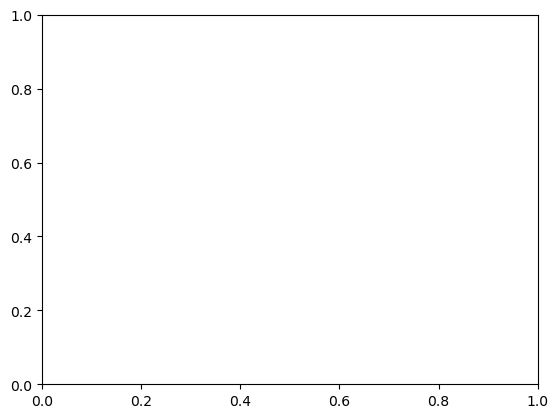

In [28]:
fs=2000.0
freqs = np.arange(1,100)

times = np.arange(0, 2, 1/fs)

coh = con.get_data()
#coh = coh[0,0,1,:,:]
plt.imshow(np.squeeze(coh), extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

Shape of coh: (4, 99, 4000)


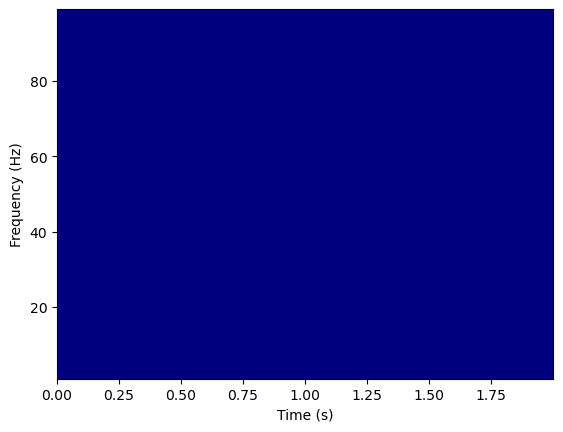

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fs = 2000.0
freqs = np.arange(1, 100)
times = np.arange(0, 2, 1/fs)

coh = con.get_data()

# Check the shape of coh
print("Shape of coh:", coh.shape)

# Assuming coh has shape (4, 99, 4000), select the appropriate slice
coh_slice = coh[0, :, :]

plt.imshow(np.squeeze(coh_slice), extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [29]:
print(con)

<SpectroTemporalConnectivity | freq : [1.000000, 99.000000], time : [0.000000, 1.999500], , nave : 10, nodes, n_estimated : 2, 4, ~12.2 MB>
